In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(imagen):
    imagen = cv2.imread(imagen)
    canal_rojo = imagen[:, :, 2]
    canal_verde = imagen[:, :, 1]
    canal_azul = imagen[:, :, 0]
    num_bins = 256 
    hist_rojo = np.zeros(num_bins)
    hist_verde = np.zeros(num_bins)
    hist_azul = np.zeros(num_bins)

    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            valor_pixel = canal_rojo[i, j]
            hist_rojo[valor_pixel] += 1
            valor_pixel = canal_verde[i, j]
            hist_verde[valor_pixel] += 1
            valor_pixel = canal_azul[i, j]
            hist_azul[valor_pixel] += 1
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    ax1, ax2 = axs.flatten()
    ax1.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    ax1.set_title('Imagen Original')
    
    ax2.set_title('Histograma de Colores')
    ax2.set_xlabel('Valor de píxel')
    ax2.set_ylabel('Frecuencia')
    ax2.plot(hist_rojo, color='red', label='Canal Rojo')
    ax2.plot(hist_verde, color='green', label='Canal Verde')
    ax2.plot(hist_azul, color='blue', label='Canal Azul')
    ax2.legend()
    plt.show()

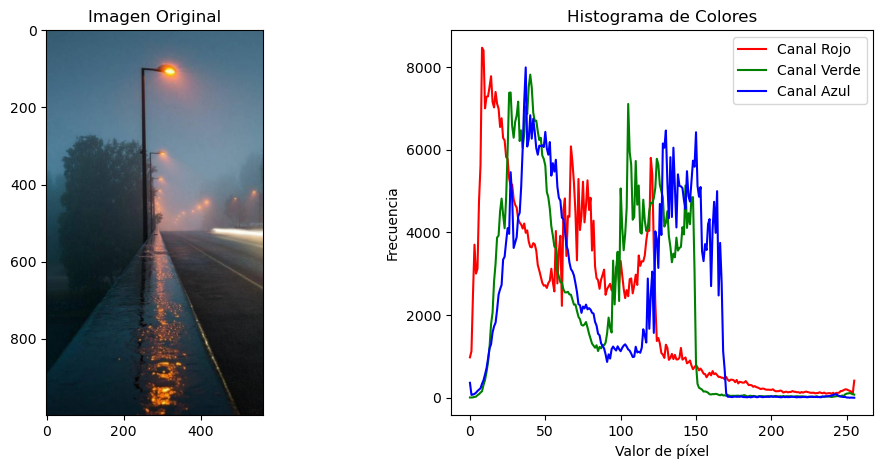

In [3]:
histograma('rain.jpeg')

562437


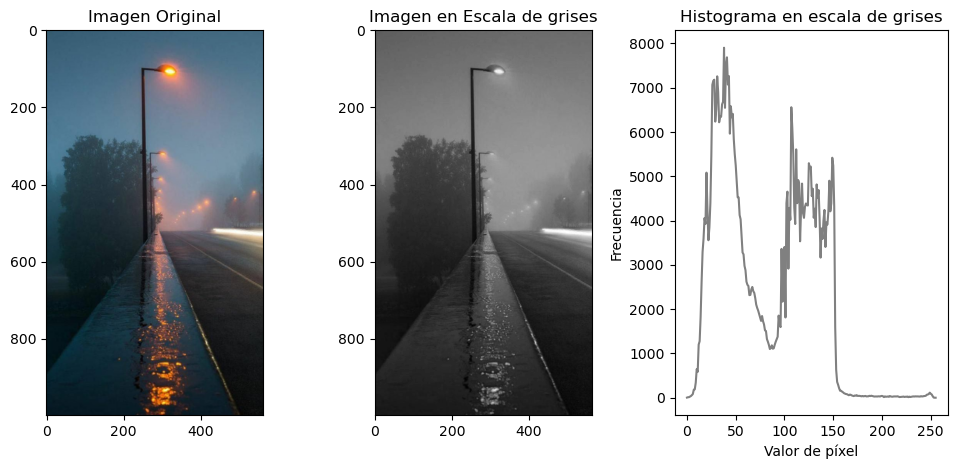

In [13]:
def gray(imagen):
    imagen = cv2.imread(imagen)
    imagen_gris = np.zeros((imagen.shape[0], imagen.shape[1]), dtype=np.uint8)
    valores_gris = np.zeros(256)
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):            
            r, g, b = imagen[i, j]
            gris = int(0.299 * r + 0.587 * g + 0.114 * b)
            imagen_gris[i, j] = gris
            valores_gris[gris] = valores_gris[gris] + 1
            
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))
    ax1, ax2, ax3 = axs.flatten()
    ax1.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    ax1.set_title('Imagen Original')
    
    ax2.set_title('Imagen en Escala de grises')
    ax2.imshow(imagen_gris, cmap='gray')
    
    ax3.set_title('Histograma en escala de grises')
    ax3.set_xlabel('Valor de píxel')
    ax3.set_ylabel('Frecuencia')
    ax3.plot(valores_gris, color='gray')
    
    print(np.size(imagen_gris))

    
gray('rain.jpeg')
    